# MATH 210 Introduction to Mathematical Computing

**March 8, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Consider $y' = f(t,y), y(t_0) = y_0$. Euler's method is the recursive sequence

$$
y_{n+1} = y_n + f(t_n,y_n) h \ , \ \ t_n = t_0 + nh \ , \ \ y_0 = y(t_0)
$$

Write a function called `odeEuler` which takes input parameters `f`, `t` and `y0` where

* `f` is a Python function which represents the right side of $y' = f(t,y)$
* `t` is a vector of $t$ values such that the first entry `t[0]` is $t_0$
* `y0` is the initial value $y(t_0)$

The function returns the vector of $y$ values corresponding to the approximations $y_n \approx y(t_n)$.

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n + 1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

In [3]:
f = lambda t,y: y
t = np.linspace(0,1,3)
y0 = 1
y = odeEuler(f,t,y0)
print(y) # [1.0,1.5,2.25]

[1.   1.5  2.25]


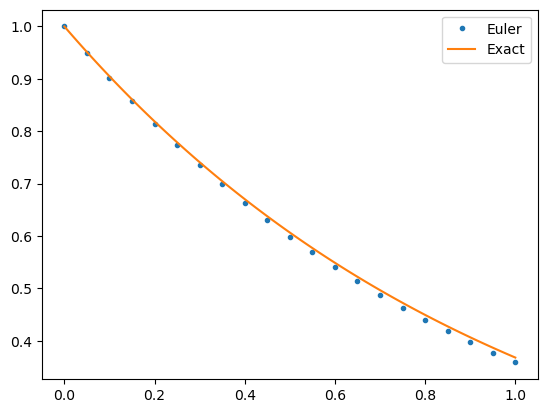

In [5]:
f = lambda t,y: -y # y' = -y => solution is y(t) = e^{-t}
t = np.linspace(0,1,21)
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,'.',label='Euler')
t_exact = np.linspace(0,1,100)
y_exact = np.exp(-t_exact)
plt.plot(t_exact,y_exact,label='Exact')
plt.legend()
plt.show()

Apply Euler's method to $y' = y\cos(t), y(0)=1$. Plot with the exact solution.

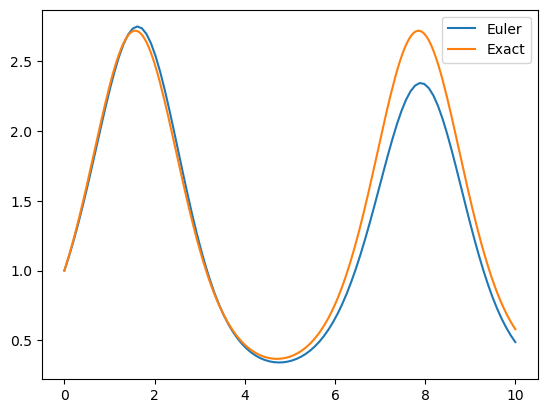

In [6]:
f = lambda t,y: y*np.cos(t)
t = np.linspace(0,10,100)
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,label='Euler')
t_exact = np.linspace(0,10,200)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact,y_exact,label='Exact')
plt.legend()
plt.show()

## Heun's Method

In [7]:
def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1],y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

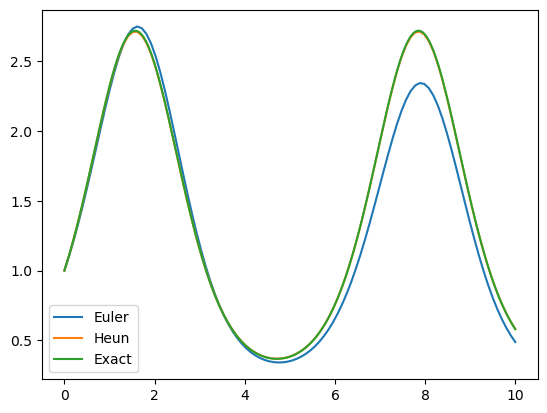

In [8]:
f = lambda t,y: y*np.cos(t)
t = np.linspace(0,10,100)
y0 = 1
y1 = odeEuler(f,t,y0)
y2 = odeHeun(f,t,y0)
plt.plot(t,y1,label='Euler')
plt.plot(t,y2,label='Heun')
t_exact = np.linspace(0,10,200)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact,y_exact,label='Exact')
plt.legend()
plt.show()